In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import re

# ===== 讀取 Excel =====
excel_file_path = '/content/drive/MyDrive/生醫智慧工程/train_Data.xlsx'
df = pd.read_excel(excel_file_path)

In [32]:
df.head()

,ID,label,content_cleaned
0,1,0,葉黃素、益生菌、魚油、蔓越莓錠。你需要的保健品️日本味王全部都有。家裡備著日本味王保健品。好...
1,2,1,海底椰是一種夏季常見的湯料以清燥熱、止咳功效顯著而聞名且具有滋陰補腎、潤肺養顏、強壯身體機能...
2,3,0,杏輝活芯升級版。健康從芯開始。一整天的會議轟炸感覺精神不濟、提不起勁只想癱在床上。趕公車、爬...
3,4,1,淨亮效果AAA擊退暗沉更快速亮澤肌防護AAA光澤AAA。你是否擁有以下肌膚問題:肌膚蠟黃暗沉...
4,5,0,醫學實證000有感排便順暢。保證投入菌數高達000億。益生菌AAA益生元AAA後生元。調整體...


In [33]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['content_cleaned']
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=100,  # 100 samples for the test set
    stratify=y,     # Stratify based on the 'label' column
    random_state=42 # for reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of labels in y_train:")
display(y_train.value_counts())

print("\nDistribution of labels in y_test:")
display(y_test.value_counts())

Shape of X_train: (1442,)
Shape of X_test: (100,)
Shape of y_train: (1442,)
Shape of y_test: (100,)

Distribution of labels in y_train:


,count
label,
1,721
0,721



Distribution of labels in y_test:


,count
label,
0,50
1,50


上面程式碼用來分開資料集>>分為train跟test資料集

In [17]:
# Install Jieba for Chinese word segmentation
!pip install jieba

下系統指令安裝某某某套件(可改)

In [34]:
import jieba

def segment_text(text):
    if isinstance(text, str):
        # Perform word segmentation
        seg_list = jieba.cut(text, cut_all=False) # cut_all=False for accurate mode
        return " ".join(seg_list)
    else:
        return ""

# Apply word segmentation to the cleaned content in both training and testing sets
X_train_segmented = X_train.apply(segment_text)
X_test_segmented = X_test.apply(segment_text)

print("Original X_train sample:")
display(X_train.head())

print("\nSegmented X_train sample:")
display(X_train_segmented.head())

print("\nOriginal X_test sample:")
display(X_test.head())

print("\nSegmented X_test sample:")
display(X_test_segmented.head())

Original X_train sample:


,content_cleaned
895,打破年齡設限‧看見青春立體。0AAA。撐補成分歲月細節一股腦地顯現在外表。支‧撐‧力000A...
187,兒童專科舒緩情緒消化提升敏感調理全台最足量健康食品變聰明變聰明的零食天然增加學習效率針對敏弱...
1440,0%增稠000%香料000%色素。維持消化道機能。日本專利膳食纖維多元益生菌。黃金比例口感細...
601,小胸救星升AAA不難。小胸&大胸女孩是不是有以下煩惱。撐不起衣服。哺乳後ㄋㄋ大縮水。美型拉提...
69,便秘救星、減肥聖品、減肥瘦瘦水、便祕必喝、便祕必喝、被封是減肥&解便秘聖品、便祕必喝、減肥聖...



Segmented X_train sample:


,content_cleaned
895,打破 年齡 設限 ‧ 看見 青春 立體 。 0AAA 。 撐補 成分 歲 月 細節 一股 腦...
187,兒童 專科 舒緩 情緒 消化 提升 敏感 調理 全台 最 足量 健康 食品 變聰明 變聰明 ...
1440,0% 增稠 000% 香料 000% 色素 。 維持 消化道 機能 。 日本 專利 膳食 纖...
601,小胸 救星 升 AAA 不難 。 小胸 & 大胸 女孩 是不是 有 以下 煩惱 。 撐 不起...
69,便秘 救星 、 減肥 聖品 、 減 肥瘦 瘦水 、 便 祕 必 喝 、 便 祕 必 喝 、 ...



Original X_test sample:


,content_cleaned
1078,享受尚好生活。享食尚健字號甘甘好活力加值組黃金組合甘甘好膠囊衛部健食字第AAA000號專為您...
1318,超模之鑰。防溢方案。官網000下殺000典悅生醫AAA搭配營養素幫助調節生理機能維持身體健康...
1348,商品。0益生菌益生質互利共生。0項全球專利後生元調整體質。幫助維持消化道機能。0色素、0人工...
89,抗藍光護眼軟糖。不如就給他吃抗藍光軟糖吧。吸收強光、過濾藍光、保護眼睛。適合族群:長時間盯著...
718,體力、美力一次擁有。0種AAA群完整組合。0合000美妍配方讓妳青春好自信。長效緩釋持續釋放...



Segmented X_test sample:


,content_cleaned
1078,享受 尚好 生活 。 享食 尚健字號 甘甘好 活力 加值 組黃金 組合 甘甘好 膠囊 衛部 ...
1318,超模 之 鑰 。 防溢 方案 。 官網 000 下 殺 000 典悅 生醫 AAA 搭配 營...
1348,商品 。 0 益生菌 益生質 互利 共生 。 0 項 全球 專利後生 元 調整 體質 。 幫...
89,抗藍光護 眼軟 糖 。 不如 就給 他 吃 抗藍光 軟糖 吧 。 吸收 強光 、 過濾 藍光...
718,體力 、 美力 一次 擁有 。 0 種 AAA 群 完整 組合 。 0 合 000 美妍 配...


jieba套件執行>將文字裁剪並進行特徵擷取

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with min_df=2 to only include terms that appear at least twice
vectorizer = CountVectorizer(min_df=3)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

# Transform the testing data using the learned vocabulary
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (1442, 3296)
Shape of X_test_bow: (100, 3296)


檢查文字>出現一定次數的(2，可改)才可以留下來

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the MLP model
model = Sequential([
    # Explicitly define the input shape based on the number of features in X_train_bow
    Dense(1, activation='sigmoid', input_shape=(X_train_bow.shape[1],))
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy']) # Monitor accuracy

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │         3,297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,297 (12.88 KB)

 Trainable params: 3,297 (12.88 KB)

 Non-trainable params: 0 (0.00 B)

利用套件keras(可改)行深度學習，制定模型

In [59]:
# Train the model
# Convert y_train and y_test to numerical dtype
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)

# Convert sparse matrix to dense for Keras Dense layer compatibility
X_train_bow_dense = X_train_bow.todense()


history = model.fit(X_train_bow_dense, y_train_numerical, # Use dense input for training
                    epochs=1, # Number of training epochs
                    shuffle=False,
                    batch_size=980, # Batch size
                    validation_split=0.3) # Use 30% of training data for validation

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8656 - loss: 0.5793 - val_accuracy: 0.8499 - val_loss: 0.5777


訓練模型、batch site 可改

In [60]:
# Evaluate the model on the test set
# Convert y_test to numerical dtype if it hasn't been already
y_test_numerical = y_test.astype(int)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()


loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8492 - loss: 0.5834

Test Loss: 0.5834
Test Accuracy: 0.8600


In [43]:
# Ensure X_test_bow is a dense array and y_test is numerical
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

# Predict probabilities and get class predictions
y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_dense, y_test_numerical)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3525 - loss: 0.7315 

Test Loss: 0.7281
Test Accuracy: 0.3500


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3525 - loss: 0.7315

Test Loss: 0.7281
Test Accuracy: 0.3500


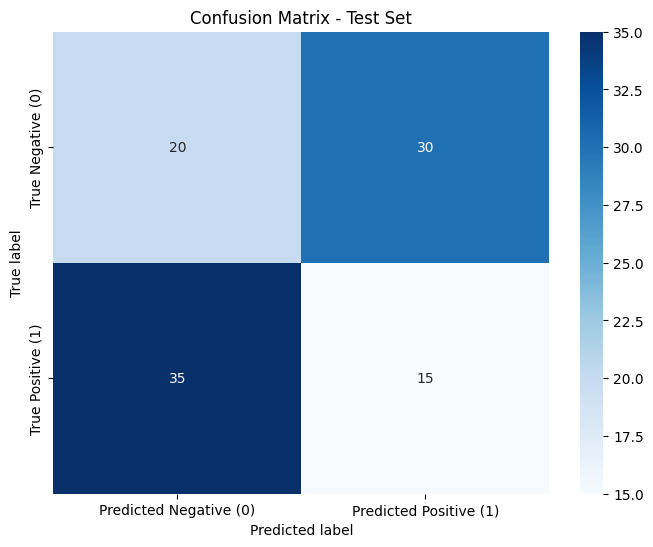

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.40      0.38        50
           1       0.33      0.30      0.32        50

    accuracy                           0.35       100
   macro avg       0.35      0.35      0.35       100
weighted avg       0.35      0.35      0.35       100


[True Negative]
Text: 蔓越莓萃取含特殊AAA型前青素。A000乳酸菌獨家專利包覆技術。維生素AAA抗氧化作用養顏美容。
True Label: 0
Pred Label: 0

[True Positive]
Text: 纖體盈動輕盈排出體內積聚為了讓身心更加放鬆幫助身心進入一個更加寧靜的狀態有助於放鬆身心促進更好的睡眠品質。心情低落、經期不適連帶影響口氣、膚況、消化系統身體腸道不順皮膚乾燥暗沈每月經痛無力美麗心情纖體亦纖心不受痛經擾安神寧心降低血糖促進腸道蠕動利水滲濕。中藥材、漢材。喝了薏仁消濕茶後感到身體輕盈水腫減少對於便祕問題薏仁茶的效果相當出色。有助於緩解壓力喝了之後感到放鬆和安心。容易感冒的我黃耆活氣茶似乎增強了我的免疫系統讓我少了一些生病的次數。菊花睛明茶是我在工作長時間使用電腦後的最佳解藥喝了感到眼睛疲勞明顯減輕。對於眼睛容易疲勞和乾澀的問題菊花睛明茶是我找到的最好解決方法。漢方中藥。
True Label: 1
Pred Label: 1

[False Negative]
Text: 美肌纖體細琢零瑕美肌、彈力支撐。肌膚就是要澎、亮、潤、透。喚醒彈力記憶關鍵醫美醫師指定成分彈嫩支撐鎖水防護。現在的彈力度是我從來沒有感受過的。如同彈簧床中的彈簧角色是喚醒彈力記憶的重要關鍵。鎖住水份彈潤透亮。醫美醫師指定成分。服用。
True Label: 1
Pred Label: 0

[False Positive]
Text: 特選苦甜巧克力代替可可

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure X_test_bow is a dense array and y_test is numerical
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

# Predict probabilities and get class predictions
y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_dense, y_test_numerical)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Generate and print the classification report
report = classification_report(y_test_numerical, y_pred)
print("Classification Report:")
print(report)

# Generate and print examples
results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])

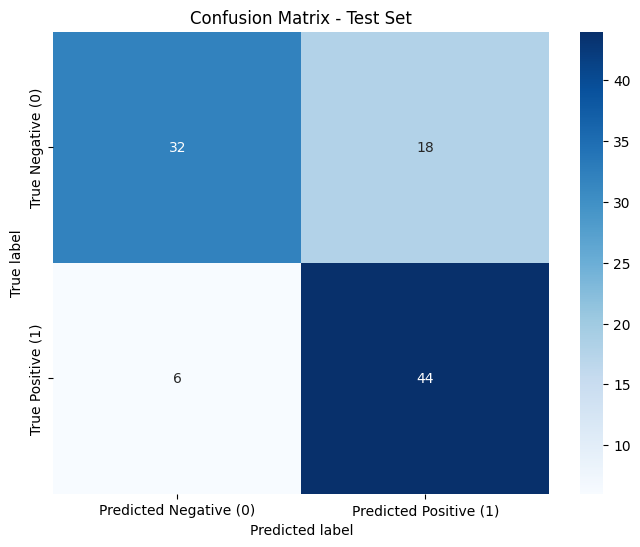

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [27]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.64      0.73        50
           1       0.71      0.88      0.79        50

    accuracy                           0.76       100
   macro avg       0.78      0.76      0.76       100
weighted avg       0.78      0.76      0.76       100



In [28]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

[True Negative]
Text: 生命石益倍鈣有效調節鈣質吸收幫助維持骨骼健康。含豐富營養素有助於促進身體機能平衡幫助維持健康體魄。每日適量補充助您活力滿滿健康生活無憂。
True Label: 0
Pred Label: 0

[True Positive]
Text: 私密處救星拒絕乾癢、分泌物異常等等壞毛病。私密處老是有難言之隱嗎好菌調理擺脫潮濕悶癢。陰源益生菌。女性私密處救星。健康護理陰源益生菌。私密呵護。有以下困擾的女性:乾癢不適、異味困擾、時常憋尿、分泌物多。穩定腸胃道建立順暢體質。保養女性私密處健康。舒適私密女性私密處女性私密處護理。專為女孩、女人、年長女性準備的女性私密處保養益生菌為世界上所有女性準備的腸道與私密處雙效護理乳酸菌。私密益生菌私密處乳酸菌陰源益生菌從健康女性陰道細胞分離出的菌株。
True Label: 1
Pred Label: 1

[False Negative]
Text: 超燃、好曲線有效瓦解燃燒有型。有效提升運動效率體內美型因子有效體態窈窕管理激發深層燃力。有效攔截多餘卡路里攝取從體內阻斷根源。體內的能量發電機減少多餘堆積的法寶。解頑固油膩能打擊代謝所產生廢物排除多餘的負擔適合腸胃卡關無法卸下垃圾的族群。
True Label: 1
Pred Label: 0

[False Positive]
Text: 歐美發明金牌獎全球多國認證德國專利新型技術。美國科學發明獎金牌。A。波蘭華沙發明獎。
True Label: 0
Pred Label: 1

[Random]
Text: 減肥不怕沒有未來。胰島素減肥減糖減油減齡。阻隔醣和油。促進循環。直達肥胖源頭。打造易瘦體質。減的是脂肪。使用升級產品讓我瘦到000字頭。準備結婚的我體重000公斤000年後000孩子媽的我比結婚前還瘦。再加上因為我常年受鼻子過敏、鼻竇炎和腸胃炎、胃痛的困擾長年一直在吃類固醇、抗生素、止痛、消炎藥、胃藥等西藥。去年使用產品瘦身成功後不只陳年鼻病改善甚至抽血報告紅轉黑。停產品000月居然瘦下來的數據都沒有變果然有修復肥胖源頭真的不一樣。產品加強了碎脂技術。使用升級產品不到兩個月就讓我突破去年瘦下來的數字體重來到000字頭。我的數據改變如下:體重000AAA體脂000%